### import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [28]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

TypeError: string indices must be integers, not 'str'

In [24]:
import yfinance as yf

start = '2015-04-07'
end = '2024-04-07'

# Fetching data for AAPL from Yahoo Finance
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the dataframe
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-07,31.910000,32.029999,31.495001,31.502501,28.274397,140049200
2015-04-08,31.462500,31.600000,31.242500,31.400000,28.182402,149316800
2015-04-09,31.462500,31.645000,31.165001,31.639999,28.397816,129936000
2015-04-10,31.487499,31.802500,31.315001,31.775000,28.518974,160752000
2015-04-13,32.092499,32.142502,31.652500,31.712500,28.462877,145460400


In [ ]:
df.tail()

In [ ]:
df = df.reset_index()
df.head()

In [16]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,31.910000,32.029999,31.495001,31.502501,140049200
1,31.462500,31.600000,31.242500,31.400000,149316800
2,31.462500,31.645000,31.165001,31.639999,129936000
3,31.487499,31.802500,31.315001,31.775000,160752000
4,32.092499,32.142502,31.652500,31.712500,145460400


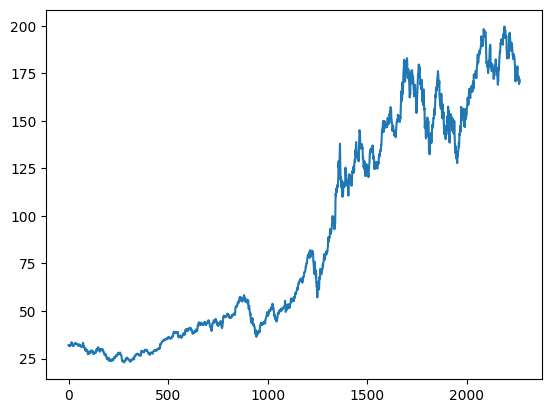

In [57]:
plt.plot(df.High)

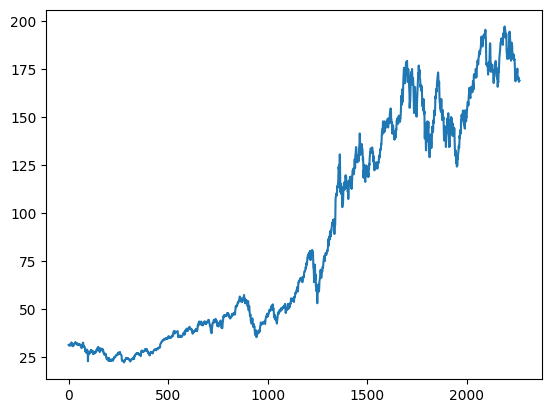

In [58]:
plt.plot(df.Low)


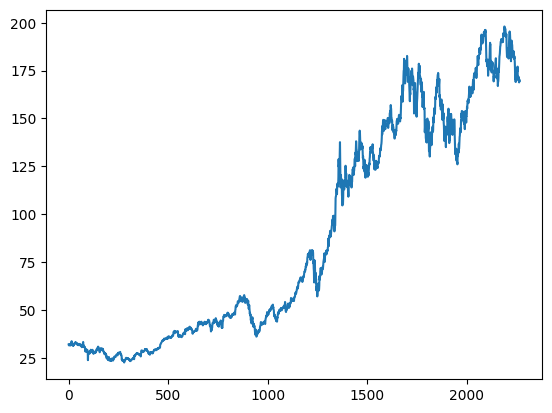

In [59]:
plt.plot(df.Open)


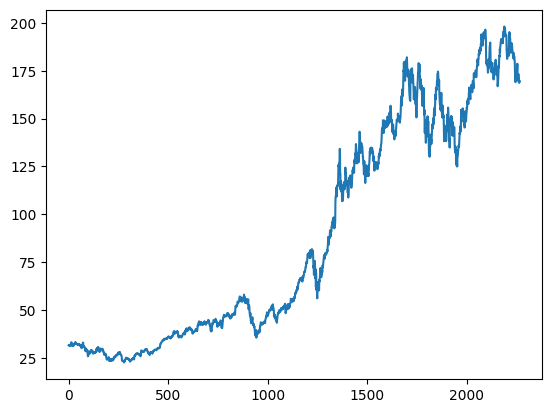

In [60]:
plt.plot(df.Close)


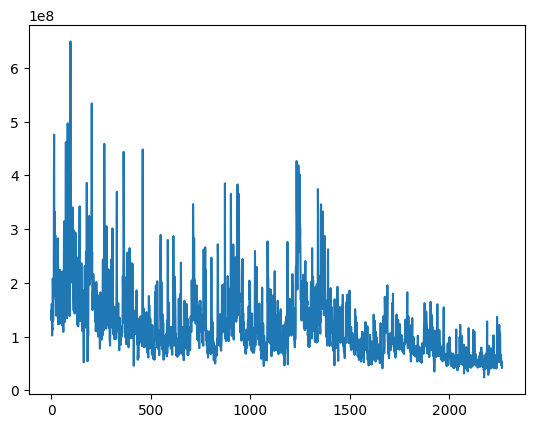

In [61]:
plt.plot(df.Volume)

In [62]:
df

,Open,High,Low,Close,Volume
0,31.910000,32.029999,31.495001,31.502501,140049200
1,31.462500,31.600000,31.242500,31.400000,149316800
2,31.462500,31.645000,31.165001,31.639999,129936000
3,31.487499,31.802500,31.315001,31.775000,160752000
4,32.092499,32.142502,31.652500,31.712500,145460400
...,...,...,...,...,...
2261,171.190002,171.250000,169.479996,170.029999,46240500
2262,169.080002,169.339996,168.229996,168.839996,49329500
2263,168.789993,170.679993,168.580002,169.649994,47691700
2264,170.289993,171.919998,168.820007,168.820007,53704400


In [63]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2261    185.2313
2262    185.1274
2263    185.0057
2264    184.8650
2265    184.7367
Name: Close, Length: 2266, dtype: float64

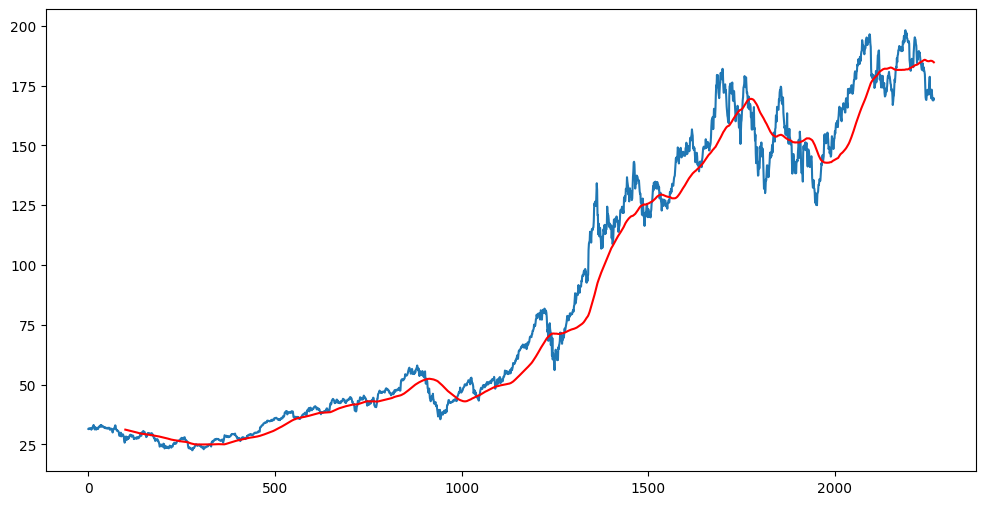

In [64]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [65]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2261    183.45455
2262    183.37900
2263    183.29720
2264    183.21670
2265    183.13955
Name: Close, Length: 2266, dtype: float64

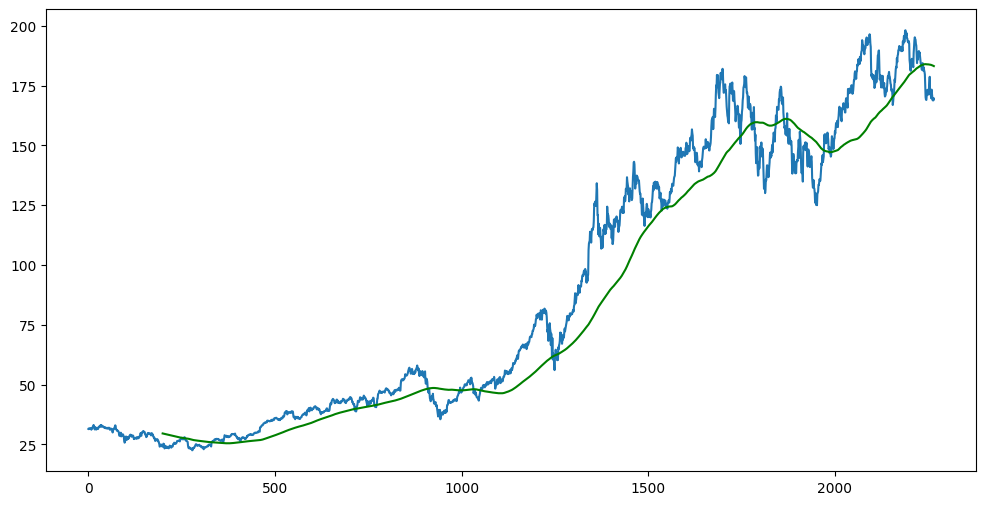

In [66]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'g')

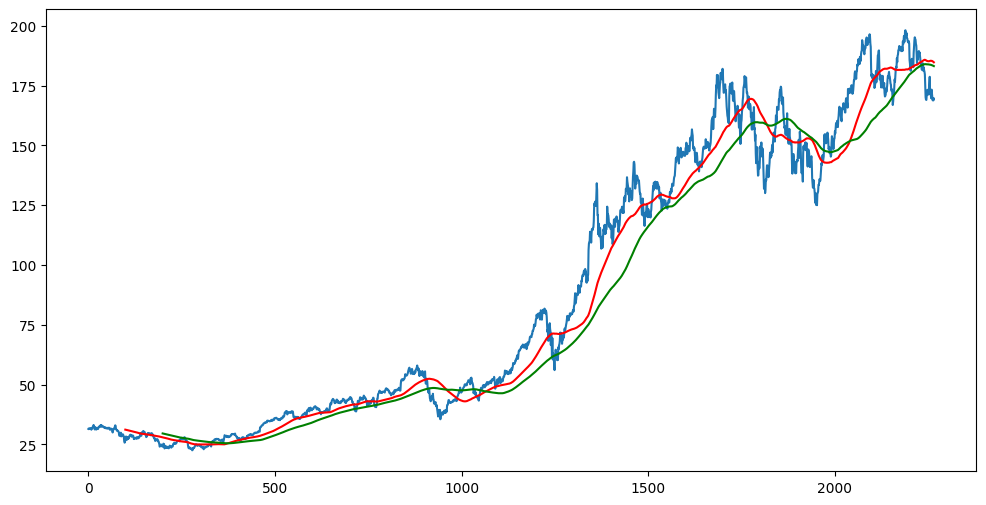

In [67]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [68]:
# splitting data in training & testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])



In [29]:
data_training.head()

,Close
0,31.502501
1,31.400000
2,31.639999
3,31.775000
4,31.712500


In [69]:
data_testing.head()

,Close
1586,148.559998
1587,148.990005
1588,146.770004
1589,144.979996
1590,145.639999


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.07045788],
       [0.06964801],
       [0.07154427],
       ...,
       [0.97629676],
       [0.97037095],
       [0.98143254]])

In [72]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
# ML Model

In [74]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [75]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - loss: 0.0577
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 0.0075
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - loss: 0.0052
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 0.0052
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - loss: 0.0057
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - loss: 0.0049
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - loss: 0.0042
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0049
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - loss: 0.0068
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0033
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - loss: 0.0048
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 0.0034
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 0.0032
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - loss: 0.0031
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/s

In [78]:
model.save('keras_model.h5')

In [79]:
data_testing.head()

,Close
1586,148.559998
1587,148.990005
1588,146.770004
1589,144.979996
1590,145.639999


In [80]:
data_training.tail(100)

,Close
1486,125.120003
1487,122.059998
1488,120.129997
1489,121.419998
1490,116.360001
...,...
1581,146.389999
1582,142.449997
1583,146.149994
1584,145.399994


In [82]:
past_100_days = data_training.tail(100)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [91]:
final_df.head()

,Close
0,125.120003
1,122.059998
2,120.129997
3,121.419998
4,116.360001


In [93]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10715599],
       [0.06972473],
       [0.04611617],
       [0.06189599],
       [0.        ],
       [0.05785927],
       [0.04428138],
       [0.06850151],
       [0.05712536],
       [0.0933333 ],
       [0.11266054],
       [0.10275231],
       [0.05100915],
       [0.04440364],
       [0.08599387],
       [0.07559633],
       [0.04562686],
       [0.05174307],
       [0.0593272 ],
       [0.06152904],
       [0.04330276],
       [0.0708257 ],
       [0.08122323],
       [0.11669726],
       [0.12048928],
       [0.14116209],
       [0.17125382],
       [0.20354739],
       [0.18201841],
       [0.22103966],
       [0.19168193],
       [0.22189602],
       [0.21773704],
       [0.22605499],
       [0.20489297],
       [0.2096636 ],
       [0.19058106],
       [0.21969427],
       [0.22458716],
       [0.22055044],
       [0.21064222],
       [0.2094189 ],
       [0.18470955],
       [0.1979204 ],
       [0.14055043],
       [0.14360863],
       [0.16366978],
       [0.169

In [94]:
input_data.shape

(780, 1)

In [95]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [96]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [97]:
# Making Predictions

y_predicted = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step


In [98]:
y_predicted.shape

(680, 1)

In [99]:
y_test


array([0.39388375, 0.39914379, 0.37198781, 0.35009168, 0.35816512,
       0.36085627, 0.35669729, 0.37920489, 0.37418956, 0.37553513,
       0.36428133, 0.36366967, 0.35767591, 0.36085627, 0.39792047,
       0.40048936, 0.42519871, 0.41382265, 0.36697248, 0.37113145,
       0.38935782, 0.40795114, 0.40685009, 0.39143731, 0.38140664,
       0.39437316, 0.44966354, 0.43388381, 0.44220176, 0.45614671,
       0.46409789, 0.49333336, 0.47400612, 0.46128449, 0.39889909,
       0.40599391, 0.38850146, 0.39963301, 0.39669716, 0.36330271,
       0.32513764, 0.3311314 , 0.36073401, 0.37272173, 0.3738226 ,
       0.35486232, 0.31253826, 0.32379206, 0.30752293, 0.32159013,
       0.27865442, 0.30275229, 0.31363914, 0.32941887, 0.32464824,
       0.32354736, 0.30764519, 0.30030585, 0.33516812, 0.34837915,
       0.36929667, 0.3963302 , 0.40244641, 0.40513755, 0.39547403,
       0.39486237, 0.40318051, 0.39743126, 0.44293586, 0.40905202,
       0.39877683, 0.41174316, 0.42972483, 0.42324166, 0.42715

In [100]:
y_predicted

array([[0.34566087],
       [0.35146177],
       [0.35571557],
       [0.3588112 ],
       [0.36066693],
       [0.36127374],
       [0.360775  ],
       [0.35935068],
       [0.3574683 ],
       [0.35554188],
       [0.35389036],
       [0.35258374],
       [0.35157955],
       [0.35073537],
       [0.34995502],
       [0.34961042],
       [0.3501227 ],
       [0.35206237],
       [0.35554567],
       [0.3598336 ],
       [0.36400244],
       [0.36756825],
       [0.37056684],
       [0.3731671 ],
       [0.37531912],
       [0.37680304],
       [0.37762058],
       [0.3786007 ],
       [0.3803447 ],
       [0.38328022],
       [0.3876884 ],
       [0.39361614],
       [0.40129912],
       [0.41047364],
       [0.42033392],
       [0.4287922 ],
       [0.43419003],
       [0.43560377],
       [0.43313563],
       [0.4274568 ],
       [0.41921234],
       [0.4088513 ],
       [0.39702505],
       [0.3845349 ],
       [0.37242955],
       [0.36154914],
       [0.35229918],
       [0.344

In [101]:
scaler.scale_

array([0.01223242])

In [103]:
scale_factor = 1/0.01223242
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

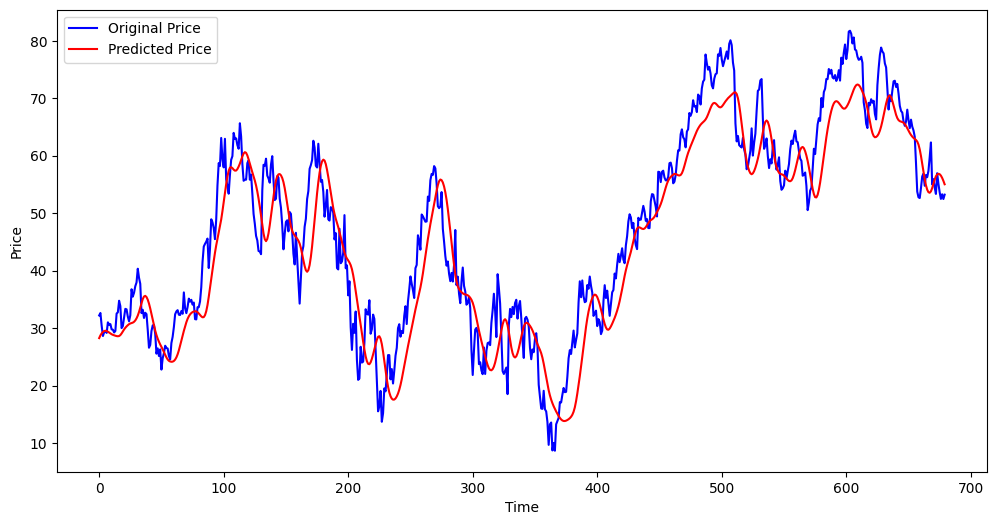

In [104]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()